In [5]:
import os 
import numpy as np
import pandas as pd 
from xgboost import XGBClassifier
from boruta import BorutaPy
from BorutaShap import BorutaShap, load_data
from sklearn.model_selection import train_test_split

In [6]:
patient_list  =  ['P1 N1', 'P2 N1', 'P2 N2', 'P3 N1', 'P3 N2', 'P4 N1', 'P4 N2', 'P5 N1',
                   'P6 N2', 'P7 N1', 'P7 N2','P8 N1','P10 N1', 'P11 N1', 'P15 N1',
                  'P16 N1', 'P17 N1', 'P18 N1','P20 N1', 'P21 N1', 'P21 N2', 'P21 N3',
                  'P22 N1','P23 N1', 'P23 N3', 'P24 N1','P27 N1','P28 N1',
                  'P28 N2', 'P29 N2', 'P30 N1']  #'P6 N1','P23 N2',

all_patients = ['P1', 'P11', 'P17', 'P18', 'P21', 'P24', 'P27','P28', 'P29', 'P4',
           'P3','P10', 'P15', 'P16', 'P2', 'P5', 'P6', 'P7','P8', 'P20',  'P22',
            'P23', 'P30']
human_wt = ['P1', 'P11', 'P17', 'P18', 'P21', 'P24', 'P27','P28', 'P29', 'P4']
human_gap = ['P3','P10', 'P15', 'P16', 'P2', 'P5', 'P6', 'P7','P8', 'P20',  'P22',
            'P23', 'P30'] 

In [8]:
conn_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/xgb_dataframes/'
cc_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Cross_Corr_Channels/'
hfd_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/hfd_df/'
hurst_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/hurst_df/'
disp_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/DispEn_DF/'

delta_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/delta/'
theta_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/theta/'
sigma_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/sigma/'
beta_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/beta/'

delta_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/delta/'
theta_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/theta/'
sigma_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/sigma/'
beta_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/beta/'

delta_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/delta/'
theta_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/theta/'
sigma_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/sigma/'
beta_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/beta/'

delta_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/delta/'
theta_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/theta/'
sigma_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/sigma/'
beta_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/beta/' 

power_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Power/'


all_dataframes = []

for patient in patient_list:
    conn_df = pd.read_csv(conn_mne + str(patient) + '_all_conn_measures.csv')
    cc_df = pd.read_csv(cc_mne + str(patient) + '.csv')
    hfd_df = pd.read_csv(hfd_mne + str(patient) + '_hfd.csv')
    hurst_df = pd.read_csv(hurst_mne + str(patient) + '_hurst.csv')
    disp_df = pd.read_csv(disp_mne + str(patient) + '_dispen.csv')
    
    delta_plv = pd.read_csv(delta_plv_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_plv = pd.read_csv(theta_plv_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_plv = pd.read_csv(sigma_plv_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_plv  = pd.read_csv(beta_plv_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    delta_pli = pd.read_csv(delta_pli_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_pli = pd.read_csv(theta_pli_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_pli = pd.read_csv(sigma_pli_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_pli  = pd.read_csv(beta_pli_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    delta_wpli = pd.read_csv(delta_wpli_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_wpli = pd.read_csv(theta_wpli_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_wpli = pd.read_csv(sigma_wpli_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_wpli  = pd.read_csv(beta_wpli_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    delta_coh = pd.read_csv(delta_coh_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_coh = pd.read_csv(theta_coh_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_coh = pd.read_csv(sigma_coh_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_coh  = pd.read_csv(beta_coh_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    power = pd.read_csv(power_dir + str(patient) + '_power_all_frequency_bands.csv')
    power_clean = power.drop(['Unnamed: 0', 'Patient_ID'], axis = 1)
    print(power_clean)
    
    # Store them in a list
    dfs = [conn_df, cc_df, hfd_df, hurst_df, disp_df, delta_plv, theta_plv, sigma_plv, beta_plv,
          delta_pli, theta_pli, sigma_pli, beta_pli, delta_wpli, theta_wpli, sigma_wpli, beta_wpli,
          delta_coh, theta_coh, sigma_coh, beta_coh, power_clean]

    # Check for 'Unnamed: 0' column and drop it if it exists
    dfs = [df.drop('Unnamed: 0', axis=1) if 'Unnamed: 0' in df.columns else df for df in dfs]
    
    # Extract them back
    #conn, cc, hfd, hurst, disp, delta_plv, theta_plv, sigma = dfs
    all_measures = pd.concat(dfs, axis = 1)
    all_dataframes.append(all_measures)

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    2.661804e-10  6.509848e-10  1.257754e-10  7.115713e-11  8.002688e-11   
1    1.972871e-09  2.528122e-09  1.933812e-09  9.841026e-10  1.595968e-09   
2    7.074433e-09  8.193481e-09  2.441292e-09  2.485048e-09  3.066617e-09   
3    4.758642e-09  2.776847e-09  2.142304e-09  1.800179e-09  1.943323e-09   
4    6.248189e-09  6.594222e-09  2.652762e-09  2.369372e-09  2.846552e-09   
..            ...           ...           ...           ...           ...   
522  6.661600e-08  6.616912e-08  4.907047e-08  3.910016e-08  4.993876e-08   
523  1.922117e-08  1.897601e-08  4.329728e-08  2.165648e-08  2.242811e-08   
524  2.697862e-08  2.683441e-08  4.247932e-08  2.248812e-08  4.779286e-08   
525  3.355472e-10  3.236108e-10  3.452942e-10  4.381052e-10  1.781821e-10   
526  2.478319e-08  2.524790e-08  1.218280e-08  4.104167e-08  3.874812e-08   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    8.490833e-09  6.948974e-09  9.881941e-10  8.357639e-10  3.275771e-09   
1    9.477308e-10  1.500000e-09  2.074178e-10  1.637800e-10  1.505761e-09   
2    2.203383e-09  1.400822e-09  6.991227e-10  6.832785e-10  2.230127e-09   
3    2.812578e-09  2.015745e-09  6.655647e-10  4.582281e-10  2.694116e-09   
4    1.862382e-09  2.109377e-09  2.752110e-09  2.684888e-09  5.249320e-10   
..            ...           ...           ...           ...           ...   
169  5.515534e-08  5.116071e-08  2.915661e-10  3.061121e-08  6.403071e-08   
170  6.418248e-09  1.214598e-09  3.950392e-10  7.122927e-10  4.287009e-09   
171  1.020041e-09  7.390246e-10  5.301628e-08  1.039475e-08  2.450268e-09   
172  5.198202e-09  9.308063e-09  1.618377e-08  2.154625e-08  1.287199e-08   
173  3.275927e-08  3.092213e-08  3.426851e-08  3.726736e-08  2.720616e-08   

      M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  ...

        E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0   5.885197e-11  5.885197e-11  5.885197e-11  5.875669e-11  6.232044e-11   
1   5.186601e-10  4.670944e-10  3.750066e-08  6.501701e-08  6.096202e-08   
2   1.832536e-08  1.860601e-08  4.582099e-08  3.953303e-08  4.847893e-08   
3   1.446679e-10  1.115330e-10  5.949508e-08  7.374455e-08  1.724198e-08   
4   5.431463e-09  5.056024e-09  3.102190e-08  4.541124e-08  1.202386e-08   
..           ...           ...           ...           ...           ...   
84  7.824130e-11  5.374914e-11  3.659954e-11  1.516166e-10  1.542640e-10   
85  9.935782e-11  5.999804e-11  5.083232e-11  1.010160e-10  9.778299e-11   
86  6.919849e-11  3.879890e-11  3.795555e-11  8.127711e-11  8.493685e-11   
87  8.073754e-11  1.429087e-10  1.116134e-10  7.106542e-10  7.117778e-10   
88  1.410289e-08  1.055641e-08  1.752809e-08  5.887601e-08  4.564651e-08   

       M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  ...  \
0   108

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    6.053131e-10  5.931563e-10  5.858347e-10  6.062105e-10  6.019918e-10   
1    2.505578e-09  2.140358e-09  1.857300e-09  8.035295e-09  2.205812e-09   
2    2.565264e-09  1.015335e-09  9.368907e-10  9.786644e-09  1.739908e-09   
3    1.212725e-09  2.134489e-10  2.808415e-10  4.307914e-09  6.665306e-10   
4    1.688574e-08  3.042323e-08  1.730207e-08  1.134718e-08  1.163282e-08   
..            ...           ...           ...           ...           ...   
217  1.166713e-09  8.573164e-10  8.436214e-10  6.692172e-10  5.694524e-09   
218  3.102846e-09  6.319202e-09  3.473634e-09  3.323337e-09  6.758910e-09   
219  1.088907e-08  1.151465e-08  1.095739e-08  1.048406e-08  1.806059e-08   
220  5.490339e-09  7.004069e-09  5.035081e-09  2.765842e-09  4.446265e-09   
221  2.325292e-09  3.171941e-09  2.670129e-09  2.312976e-09  4.033107e-09   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    6.062362e-09  6.062362e-09  6.325690e-09  6.386317e-09  6.386326e-09   
1    3.233039e-09  9.991620e-10  5.932318e-10  7.489904e-10  1.192173e-09   
2    4.081893e-09  1.582159e-09  1.177395e-09  1.951339e-09  2.692005e-09   
3    7.779891e-10  1.303653e-09  3.248489e-10  3.459463e-10  4.481931e-10   
4    1.886833e-09  2.762709e-09  1.678133e-10  5.001959e-10  4.235623e-10   
..            ...           ...           ...           ...           ...   
185  1.638707e-09  1.167669e-09  5.085656e-09  5.688172e-09  3.146303e-09   
186  6.089340e-10  6.014354e-10  1.754783e-10  1.190998e-10  3.888581e-10   
187  3.489910e-10  4.339823e-10  1.233788e-10  1.225432e-10  3.249884e-10   
188  6.518390e-09  4.308836e-09  4.476618e-09  4.879753e-09  1.271290e-08   
189  1.797803e-09  4.354793e-10  2.966012e-09  3.916444e-10  6.174118e-10   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    5.803658e-09  5.521899e-09  5.618659e-09  5.614030e-09  5.764722e-09   
1    1.615586e-08  9.673109e-09  1.258615e-08  1.122542e-08  1.431901e-08   
2    9.224541e-09  2.891831e-08  6.771531e-09  8.933893e-09  1.208663e-08   
3    4.508728e-11  5.090984e-11  6.000005e-11  3.334193e-11  5.664422e-11   
4    1.558179e-08  1.851548e-08  2.281221e-08  2.896414e-08  2.621059e-08   
..            ...           ...           ...           ...           ...   
247  1.275556e-09  6.296824e-10  9.378768e-10  3.118285e-09  1.275593e-09   
248  1.233093e-08  7.480361e-09  7.303066e-09  3.019712e-08  2.277920e-08   
249  5.185364e-10  1.795362e-10  6.118279e-11  9.597909e-10  3.884317e-09   
250  1.104372e-10  1.369176e-10  1.239969e-10  1.110639e-10  9.085210e-11   
251  4.027651e-10  2.340923e-10  5.525638e-10  1.980063e-10  5.833150e-10   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    5.786647e-11  5.882085e-11  5.865283e-11  5.739049e-11  5.837388e-11   
1    2.887899e-08  2.643899e-08  3.600562e-08  1.895614e-08  2.693516e-08   
2    6.100314e-08  6.468000e-08  2.734713e-08  2.906494e-09  6.428878e-08   
3    2.403560e-08  3.079091e-08  2.247002e-08  1.581756e-08  3.715414e-08   
4    4.364788e-09  4.339165e-09  1.195362e-09  1.069828e-09  1.130611e-09   
..            ...           ...           ...           ...           ...   
140  1.726381e-09  2.065294e-09  1.124255e-09  1.471297e-09  3.014010e-09   
141  2.244504e-09  1.404376e-09  6.989687e-10  1.010149e-09  1.738772e-09   
142  2.022742e-09  1.736143e-09  1.036807e-09  8.856745e-10  2.052643e-09   
143  2.208055e-09  2.512188e-09  1.208356e-09  1.305096e-09  1.968386e-09   
144  1.892701e-09  1.862719e-09  1.252644e-09  1.024106e-09  2.625164e-09   

       M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  ..

In [9]:
concat_all_dtaframes = pd.concat(all_dataframes, axis = 0)
df_cleaned = concat_all_dtaframes.dropna()

In [10]:
df_cleaned['Patient_ID'] = df_cleaned['Patient_ID'].str.split().str[0]
df_cleaned['Genotype'] = df_cleaned['Genotype'].map({'WT': 0, 'GAP': 1})

In [11]:
# Combine the two lists and create a list of labels (0 for human_wt and 1 for human_gap)
all_ids = np.unique(df_cleaned['Patient_ID'].to_list())
labels = [0] * len(human_wt) + [1] * len(human_gap)

# Split the combined list into training and test sets, stratifying by the labels
train_ids, test_ids,_, _ = train_test_split(all_ids, labels, test_size=0.3, stratify=labels, random_state=42)

In [12]:
X_train = df_cleaned[df_cleaned["Patient_ID"].isin(train_ids)]
X_test = df_cleaned[df_cleaned["Patient_ID"].isin(test_ids)]

group_by_patient_id = X_train.groupby(['Patient_ID'])
groups_by_patient_id_list = np.array(X_train['Patient_ID'].values)
groups_by_patient_id_list

array(['P1', 'P1', 'P1', ..., 'P29', 'P29', 'P29'], dtype=object)

In [13]:
X_train_new = X_train.iloc[:, 3:]
X_test_new = X_test.iloc[:, 3:]
y_train = X_train.iloc[:, 1]
y_test = X_test.iloc[:, 1]

In [14]:
y_train

1     0
2     0
3     0
4     0
5     0
     ..
58    0
59    0
60    0
61    0
62    0
Name: Genotype, Length: 5110, dtype: int64

In [15]:
print(len(X_train.loc[X_train['Genotype'] == 0]))
print(len(X_train.loc[X_train['Genotype'] == 1]))
print(len(X_test.loc[X_test['Genotype'] == 0]))
print(len(X_test.loc[X_test['Genotype'] == 1]))

2831
2279
389
838


In [16]:
y_train

1     0
2     0
3     0
4     0
5     0
     ..
58    0
59    0
60    0
61    0
62    0
Name: Genotype, Length: 5110, dtype: int64

In [21]:
estimator_borutashap=XGBClassifier(n_jobs = -1,
                                           random_state=42,
                                           max_depth=4)
borutashap = BorutaShap(model = estimator_borutashap,
                            importance_measure = 'shap',
                            classification = True)
borutashap.fit(X = X_train_new, y = y_train, 
                   n_trials = 200)

  0%|          | 0/200 [00:00<?, ?it/s]

57 attributes confirmed important: ['modularity_beta_plv', 'E2_RDE', 'coh_theta_F3_E2', 'modularity_theta_wpli', 'modularity_theta_plv', 'cc_F3_C3', 'M2_beta', 'F3_beta', 'coh_beta_E2_E1', 'hfd_chan_F3', 'plv_sigma_O1_E1', 'O1_beta', 'cc_C3_O1', 'plv_theta_O1_E1', 'cc_E1_E2', 'O1_dispen', 'plv_delta_C3_F3', 'coh_delta_O1_F3', 'E1_beta', 'coh_sigma_O1_E1', 'coh_beta_C3_E1', 'cc_E2_F3', 'plv_sigma_O1_F3', 'cc_F3_M2', 'cc_O1_M2', 'cc_E1_O1', 'cc_E1_M2', 'wpli_beta_E2_E1', 'coh_theta_O1_F3', 'coh_sigma_O1_E2', 'plv_theta_F3_E1', 'cc_E2_M2', 'hfd_E2', 'coh_beta_F3_E1', 'hfd_E1', 'coh_theta_O1_E1', 'cc_E2_C3', 'plv_theta_O1_E2', 'cc_E1_C3', 'pli_sigma_O1_C3', 'M2_delta', 'plv_sigma_F3_E1', 'cc_C3_M2', 'modularity_beta_coh', 'C3_beta', 'O1_sigma', 'plv_theta_E2_E1', 'E2_sigma', 'plv_beta_C3_F3', 'coh_beta_O1_C3', 'E1_sigma', 'cc_E2_O1', 'cc_F3_O1', 'plv_beta_O1_C3', 'plv_theta_O1_F3', 'hfd_chan_M2', 'plv_sigma_O1_E2']
349 attributes confirmed unimportant: ['plv_beta_M2_F3', 'wpli_sigma_M2_E1'

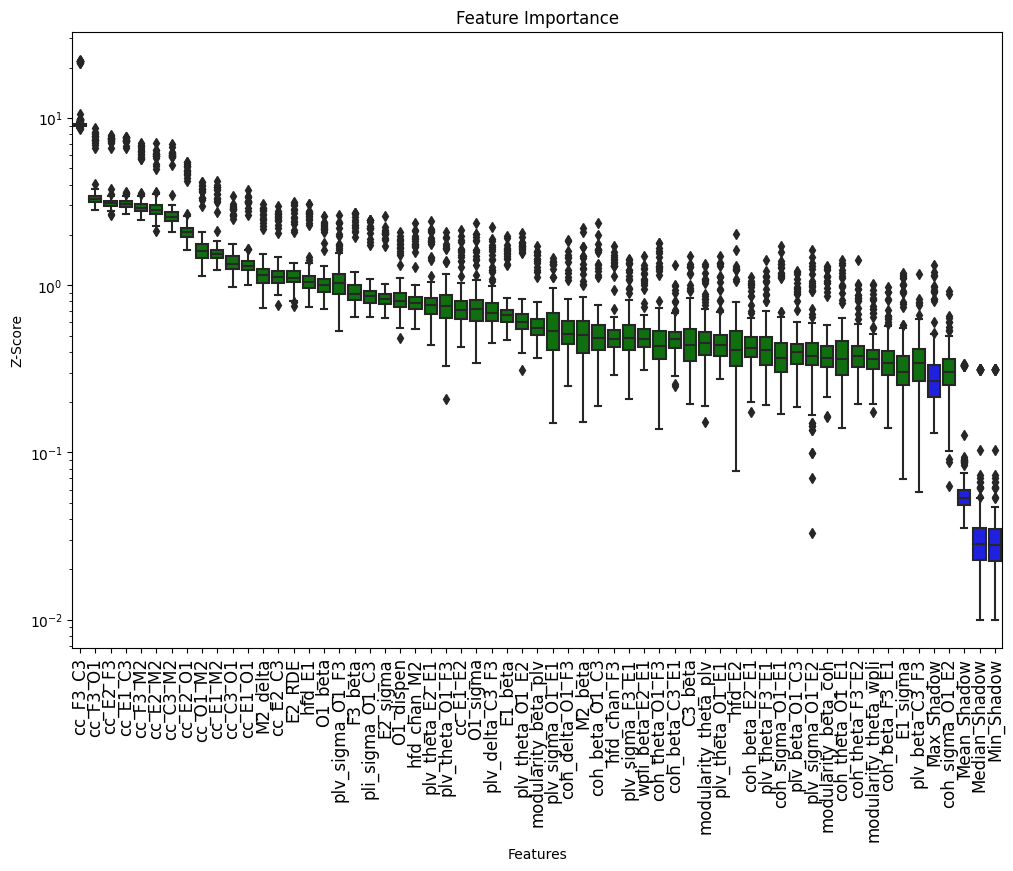

In [22]:
borutashap.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='accepted')

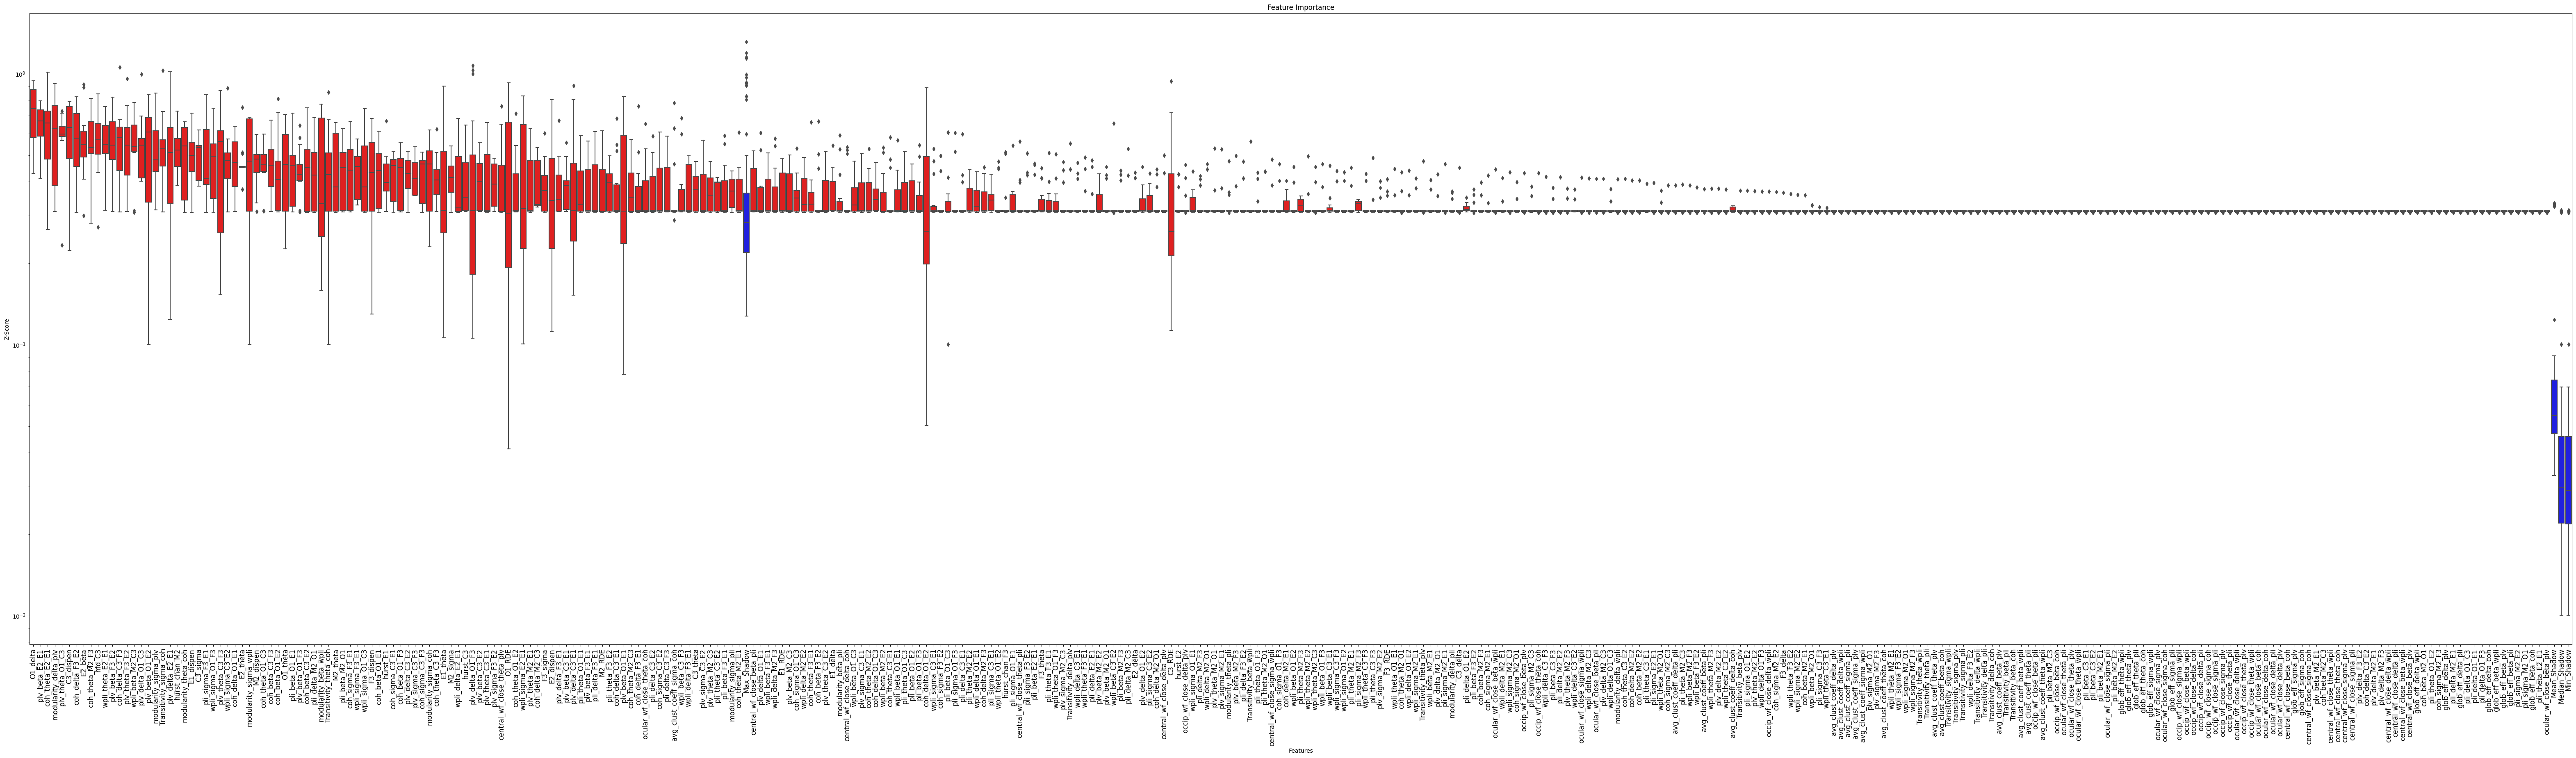

In [19]:
borutashap.plot(X_size=12, figsize=(80,20),
            y_scale='log', which_features='rejected')

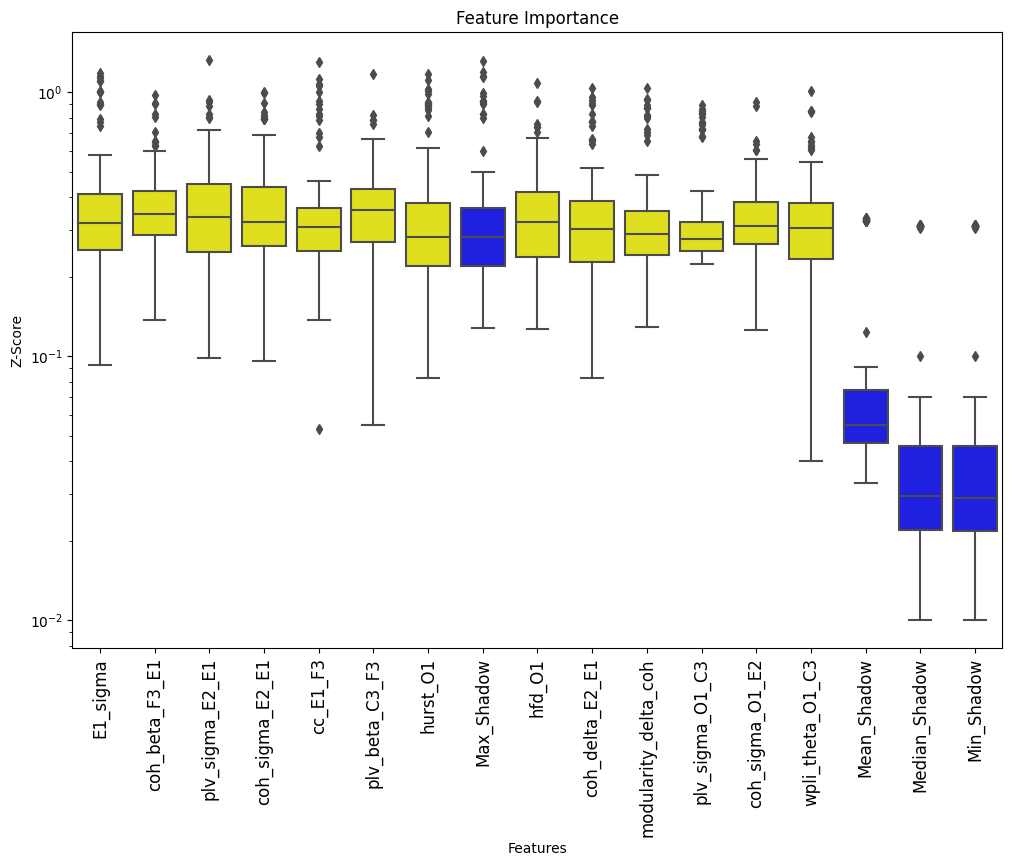

In [20]:
borutashap.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='tentative')